**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
from scipy import stats
from sklearn.metrics.pairwise import pairwise_distances
#%load_ext pycodestyle_magic


In [2]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin, ClassifierMixin):
    
    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm 
        
    
    def fit(self, X, y):
        if self.algorithm == 'brute':
            self.train_x = np.array(X)
            self.train_y = np.array(y).astype(int)
        elif self.algorithm == 'kd_tree':
            self.tree = KDTree(X)
            self.train_y = y
        self.type_quantity = len(np.unique(self.train_y))
        
    def mink_dist(self, X):
        X = X.astype(float)
        dist = pairwise_distances(X, self.train_x,'minkowski', p=2.)
        
        return dist
    
    def predict(self, X):
        if self.algorithm == 'brute':
            distances = self.mink_dist(X)
            predict = self.train_y[np.argsort(distances)[:, : self.n_neighbors]]
        
        if self.algorithm == 'kd_tree':
            X = X.astype(float)
            distances, indexes = self.tree.query(X, k=self.n_neighbors)
            predict = self.train_y[indexes]
        
        return stats.mode(predict, axis=1)[0].reshape(-1)
    
    def predict_proba(self, X):
        if self.algorithm == 'brute':
            distances = self.mink_dist(X)
            predict = self.train_y[np.argsort(distances)[:, : self.n_neighbors]]
            types_quantity = np.zeros((X.shape[0], self.type_quantity))
            
            for i in range(predict.shape[0]):
                for j in range(predict.shape[1]):
                    types_quantity[i][predict[i][j]] +=1
                    
        if self.algorithm == 'kd_tree':
            distances, indexes = self.tree.query(X, k=self.n_neighbors)
            types_quantity = np.zeros((X.shape[0], self.type_quantity))
            for i in range(np.shape(indexes)[0]):
                for j in indexes[i]:
                    types_quantity[i][int(self.train_y[j])] += 1
            
        return types_quantity / self.n_neighbors 
    
    def score(self, X, y):
        return float((self.predict(X) == y).sum() / y.shape[0]) 

**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [6]:
%time clf.fit(X_train, y_train)

Wall time: 998 µs


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [8]:
%time clf.predict(X_test)

Wall time: 996 µs


array([2, 2, 2, 1, 1, 0, 1, 0, 2, 0, 1, 1, 0, 2, 0])

In [9]:
%time my_clf.predict(X_test)

Wall time: 1.99 ms


array([2, 2, 2, 1, 1, 0, 1, 0, 2, 0, 1, 1, 0, 2, 0])

In [10]:
%time clf.predict_proba(X_test)

Wall time: 997 µs


array([[0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0.5, 0.5],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ]])

In [11]:
%time my_clf.predict_proba(X_test)

Wall time: 995 µs


array([[0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0.5, 0.5],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ]])

In [12]:
clf.score(X_test, y_test)

0.8666666666666667

In [13]:
my_clf.score(X_test, y_test)

0.8666666666666667

Задание 3

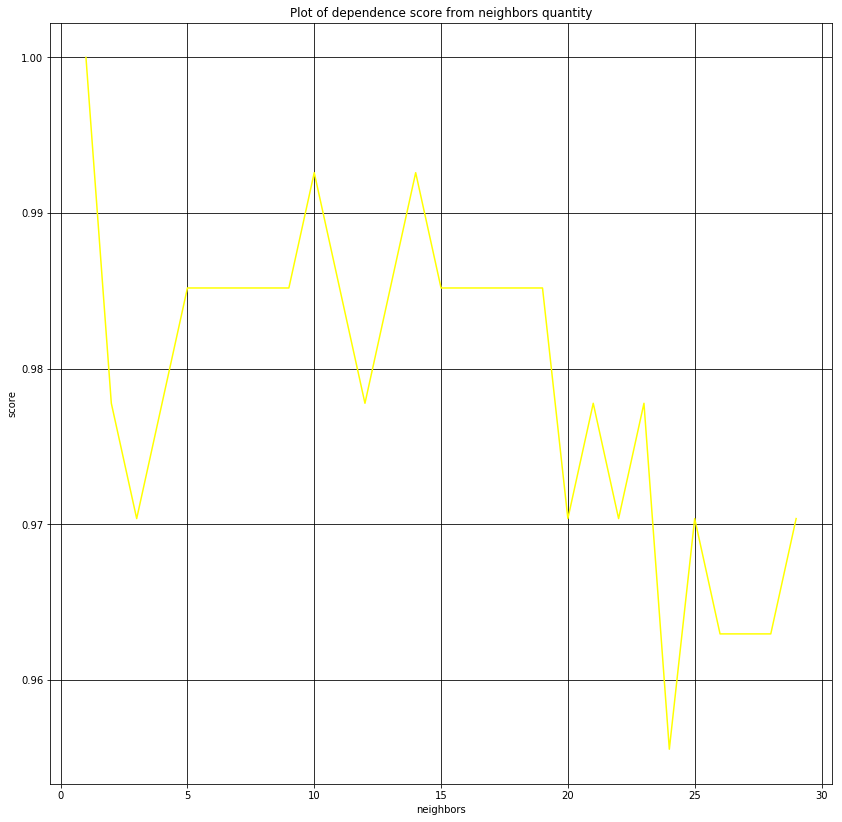

Best score is 0.9925925925925926 by the quantity of neighbors: [ 9 13]


In [14]:
N = 30
test_accuracy = np.zeros(N-1)
sklearn_test_accuracy = np.zeros(N-1)
for i in range(1, N):
    my_knn = MyKNeighborsClassifier(n_neighbors=i)
    my_knn.fit(X_train, y_train)
    test_accuracy[i-1] = my_knn.score(X_train, y_train)

best_res = np.sort(test_accuracy)[N-3]
best_res_ind = np.where(test_accuracy == best_res)

plt.figure(figsize=(14,14))
plt.subplot(1, 1, 1)
plt.grid(color="black")
plt.title("Plot of dependence score from neighbors quantity")
plt.plot(range(1,N), test_accuracy, color="yellow")
plt.xlabel('neighbors')
plt.ylabel('score')
plt.show()
#print(best_res[best_res_ind])
print('Best score is',best_res, 'by the quantity of neighbors:', *best_res_ind)



**MNIST**

In [15]:
#mnist = fetch_mldata('MNIST original')
from mlxtend.data import loadlocal_mnist
X_train, y_train = loadlocal_mnist( images_path=r'C:\Users\Леонид\Desktop\train-images.idx3-ubyte', labels_path=r'C:\Users\Леонид\Desktop\train-labels.idx1-ubyte') 
X_test, y_test = loadlocal_mnist(images_path=r'C:\Users\Леонид\Desktop\t10k-images.idx3-ubyte', labels_path=r'C:\Users\Леонид\Desktop\t10k-labels.idx1-ubyte')

In [16]:
#X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [17]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [18]:
%time clf.fit(X_train, y_train)

Wall time: 29 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [ ]:
%time my_clf.fit(X_train, y_train)

Wall time: 42.6 ms


In [ ]:
%time clf.predict(X_test)

In [ ]:
%time my_clf.predict(X_test)

In [18]:
%time clf.predict_proba(X_test)

Wall time: 4.01 ms


array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [19]:
%time my_clf.predict_proba(X_test)

Wall time: 4.52 ms


array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [20]:
clf.score(X_test, y_test)

1.0

In [21]:
my_clf.score(X_test, y_test)

1.0

Задание 4

In [20]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [21]:
#X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)
from mlxtend.data import loadlocal_mnist
X_train, y_train = loadlocal_mnist( images_path=r'C:\Users\Леонид\Desktop\train-images.idx3-ubyte', labels_path=r'C:\Users\Леонид\Desktop\train-labels.idx1-ubyte') 
X_test, y_test = loadlocal_mnist(images_path=r'C:\Users\Леонид\Desktop\t10k-images.idx3-ubyte', labels_path=r'C:\Users\Леонид\Desktop\t10k-labels.idx1-ubyte')

In [22]:
%time clf.fit(X_train, y_train)

Wall time: 30.3 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [ ]:
%time my_clf.fit(X_train, y_train)

Wall time: 36.7 s


In [ ]:
%time clf.predict(X_test)

In [ ]:
%time my_clf.predict(X_test)

In [ ]:
%time clf.predict_proba(X_test)

In [ ]:
%time my_clf.predict_proba(X_test)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
my_clf.score(X_test, y_test)

Задание 5

In [ ]:
# seaborn
# matplotlib
# train_test_split
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)
# StandardScaler (from sklearn.preprocessing import StandardScaler)
# ClassifierMixin
# NeighborsBase
# KNeighborsMixin
# SupervisedIntegerMixin

In [ ]:
# seaborn - библиотека для визуализации данных на основе matplotlib

In [ ]:
# matplotlib - библиотека с методами построения различных графиков, гистограмм и аналогичных

In [5]:
# train_test_split - функция, делящая выборку на обучающую и тестовую

In [6]:
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - функция, позволяющая последовательно преобразовывать данные

In [7]:
# StandardScaler (from sklearn.preprocessing import StandardScaler) - класс для вычисления мат. ожидания и дисперсии

In [8]:
# ClassifierMixin - класс, от которого наследуются все классификаторы из sclearn

In [9]:
# NeighborsBase - класс KNN

In [10]:
# KNeighborsMixin - класс поиска ближайших соседей

In [ ]:
# SupervisedIntegerMixin- класс метода fit